# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Алгоритм-без-шифрования" data-toc-modified-id="Алгоритм-без-шифрования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Алгоритм без шифрования</a></span></li><li><span><a href="#Алгоритм-с-шифрованием" data-toc-modified-id="Алгоритм-с-шифрованием-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Алгоритм с шифрованием</a></span></li></ul></li>

## Загрузка данных

In [1]:
!pip install phik

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
from phik import report

from sklearn.metrics import r2_score

In [3]:
#читаем файл с сайта или с компа 
try:
    df = pd.read_csv('/datasets/insurance.csv')

except:
    df = pd.read_csv('C:/Users/Dmitrii/Documents/Dstudy/matrix/insurance.csv')

In [4]:
df.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


Рассматривая первые 10 строчек видно, что имеется датасет из 5 столбцов. Пол закодирован бинарным кодом. Члены семьи и факт выплаты целочисленным значением по принципу label encoding. Возраст и зарплата имеют количественные значения.  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Анализ сводки показывает отсутствие пропусков, 5000 строк, правильно заданный тип данных. В данной работе требуется провести анализ, где целевой переменной будет выступать количество страховых выплат. Рассмотрим наличие линейной корреляции между признаками, за исключением целевого, т.к. это мешает линейной регрессии. 

interval columns not set, guessing: ['Пол', 'Возраст', 'Зарплата', 'Члены семьи']


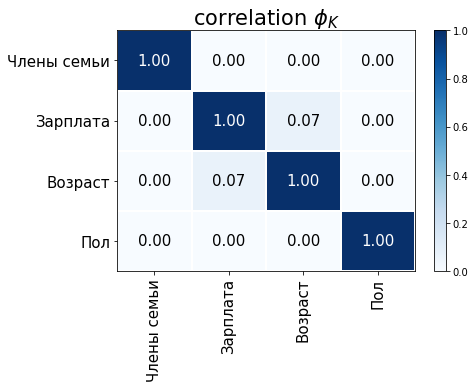

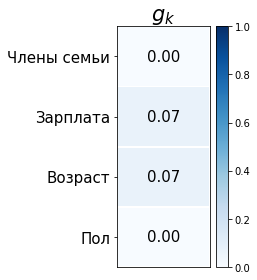

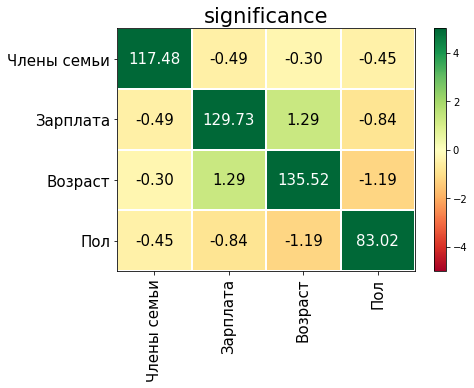

In [6]:
df_cor = df.drop('Страховые выплаты',axis=1)
rep = report.correlation_report(df_cor, significance_threshold=3, correlation_threshold=0.5)

Линейная корреляция между признаками отсутствует. 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Задача: рассмотреть вопрос о том, изменится ли качество линейной регрессии при умножении матрицы признаков на обратимую матрицу. 
**Ответ:** 

**Обоснование:** Обратимая матрица для нашего случая должна иметь квадратный размер и число столбцов равный числу признаков. Матрица признаков $w$ включая нулевой член равный единице равна $mxn$. Таким образом обратная матрица J должна иметь размер nxn. Рассмотрим формулу регрессии c дополнительной матрицей J:
$$
w1 = ((X J)^T X J)^{-1} (X J)^T y
$$
Раскроем скобки согласно свойству $ (AB)^T=B^T A^T $:
$$
w1 = (J^T X^T X J)^{-1} J^T X^T y
$$
Произведем преобразование в скобках используя свойства ассоциативности:

$$
w1 = (J^T (X^T X) J)^{-1} J^T X^T y
$$
Раскроем скобки используя свойства обратных матриц $(A B)^{-1}=B^{-1} A^{-1} $:

$$
w1 = J^{-1} (X^T X)^{-1} (J^T)^{-1} J^T X^T y
$$
Произведение $(J^T)^{-1} J^T$ равно единичной матрице, что для множителей выражения позволяет их сократить:

$$
w1 = J^{-1} (X^T X)^{-1} X^T y
$$
Сравнивая с формулой регрессии $w$ можно увидеть, что разница заключается лишь в множителе $J^{-1}$:

$$
w1 = J^{-1} (X^T X)^{-1} X^T y
$$
Таким образом получается, что  обе матрицы w1 и w связаны следующим отношением:
$$
w1=J^{-1} w
$$
Отсюда следует, что при условии переобучения вектора $X$ в формуле $a=Xw1$ будут получены результаты аналогичные использованию матрицы $w$.

## Алгоритм преобразования

**Алгоритм**

Алгоритм шифрования базы основан принципе обратимости матричных умножений. При этом следует отметить разночтение в задании проекта и пунтках проекта. В проекте требуется защитить персональные данные пользователей. Для этого идеально подходит кодирование базы ключом и последующей расшифровкой данных для передачи в функции обучения и предсказания.  Однако, в проекте предлагается обрабатывать зашифрованные данные с последующей расшифровкой, что имееет следующие недостатки:
 - изменение ключа шифрования приведет к необходимости переобучения матрицы весов(или её преобразованию)
 - сложности понимания логики работы линейной регрессии
 - метод подходит только для алгоритма линейной регрессии и не подходит для "деревянных" и других алгоритмов.

При этом приемущество у такой организации процесса только в том, что шифруется матрица весов. Таким образом мы получаем плюс, который не требуется, ведь тема проекта - защита данных пользователей, а не модели. 

Если рассматривать задачу с точки зрения "как хочет яндекс", то используем следующий алгоритм. Кодирование базы ключом->обучение модели->предсказывание->расшифровка.

**Обоснование**

Обосонованием работы алгоритм является тот фактор, что связь $w1=J^{-1} w$ происходит через матрицу J, которая может выступать ключом. При этом требования к ключу следующие:
  - матрица ключа должна быть квадратной с длиной стороны, которая соответствует правилам умножения и линейно независимой
  - матрица должна быть обратимой, что проверяется вычислением определителя матрицы J. Определитель не должен быть равен 0.
  

## Проверка алгоритма

### Алгоритм без шифрования

In [7]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [8]:
class Lin_reg:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        var = np.dot(X.T,X)
        var = np.linalg.inv(var)
        
        w = (var@X.T)@y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = Lin_reg()
model.fit(features, target)
predictions = model.predict(features)
print('Метрика R2 модели без шифрования',r2_score(target, predictions) )

Метрика R2 модели без шифрования 0.42494550286668


### Алгоритм с шифрованием

In [9]:
def crypt(size_sq):
    key_close = np.random.normal(-0.5, 0.5, (size_sq, size_sq)) # создаем кв. матрицу со случ числами
    if np.linalg.det(key_close)==0: 
        print('Повторите попытку') # проверяем чтобы существовала обратная матрица
    key_open = np.linalg.inv(key_close) # ключ расшифрования
    
    return key_close, key_open

class Lin_reg_crypt:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        var = np.dot(X.T,X)
        var = np.linalg.inv(var)
        
        w = (var@X.T)@y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [10]:
features_crypt = features.copy()
key_close, key_open = crypt(features_crypt.shape[1])

features_crypt = features_crypt@key_close

model_crypt = Lin_reg_crypt()
model_crypt.fit(features_crypt, target)
predictions_crypt = model_crypt.predict(features_crypt)
print('Метрика R2 модели с шифрованием', r2_score(target, predictions) )
print('======================')
print('Разница составляет', abs(predictions_crypt-predictions).mean())

Метрика R2 модели с шифрованием 0.42494550286668
Разница составляет 8.494410863959523e-08


Разница в метрике начинается в 7-8 знаке после запятой, что обусловлено погрешностью вычислений. Таким образом подтверждается формула, выведенная выше. 

In [11]:
df_after = features_crypt @ key_open # расшифровываем 

df_after = pd.DataFrame(df_after) # создаем датафрейм из матрицы
df_after.columns = df.columns[[0,1,2,3]] # переименовываем колонки
df_after[['Пол','Члены семьи']] = df_after[['Пол','Члены семьи']].astype('int')
df_after.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
